# 1. Séries temporais em bases financeiras

Neste trabalho, utilizaremos uma base de dados dos preços das ações de 2015 a 2021 para prever os valores das ações da BOVA11 pelos próximos 90 dias. Com a metodologia da experimentação, serão utilizados os algoritmos ARIMA e Facebook Prophet. Ao final verificaremos a acurária dos dois modelos.

# 2. Utilizando o algoritmo ARIMA

## 2.1 Importando as bibliotecas

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima



sns.set()

## 2.2 Carregando a base de dados

In [5]:
dateparse = lambda dates: datetime.datetime.strptime(dates, '%Y-%m-%d')
dataset = pd.read_csv('/content/acoes.csv', parse_dates=['Date'], index_col='Date',
                      date_parser = dateparse, usecols = ['Date', 'BOVA'])

In [6]:
dataset

,BOVA
Date,
2015-01-02,47.259998
2015-01-05,46.320000
2015-01-06,46.580002
2015-01-07,48.150002
2015-01-08,48.509998
...,...
2021-03-24,107.832138
2021-03-25,109.452454
2021-03-26,110.446930


In [7]:
time_series = dataset['BOVA']

In [8]:
time_series

Date
2015-01-02     47.259998
2015-01-05     46.320000
2015-01-06     46.580002
2015-01-07     48.150002
2015-01-08     48.509998
                 ...    
2021-03-24    107.832138
2021-03-25    109.452454
2021-03-26    110.446930
2021-03-29    111.060303
2021-04-01    110.680000
Name: BOVA, Length: 1546, dtype: float64

## 2.3 Exploração da série temporal

In [9]:
time_series.index.max()

Timestamp('2021-04-01 00:00:00')

In [10]:
time_series.index.min()

Timestamp('2015-01-02 00:00:00')

In [11]:
figura = px.line(title='Histórico do preço das ações')
figura.add_scatter(x = time_series.index, y = time_series)

## 2.4 Decomposição da série temporal

In [12]:
type(time_series)

pandas.core.series.Series

In [13]:
len(time_series) / 2

773.0

In [14]:
decomposicao = seasonal_decompose(time_series, period =len(time_series) // 2)

In [15]:
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

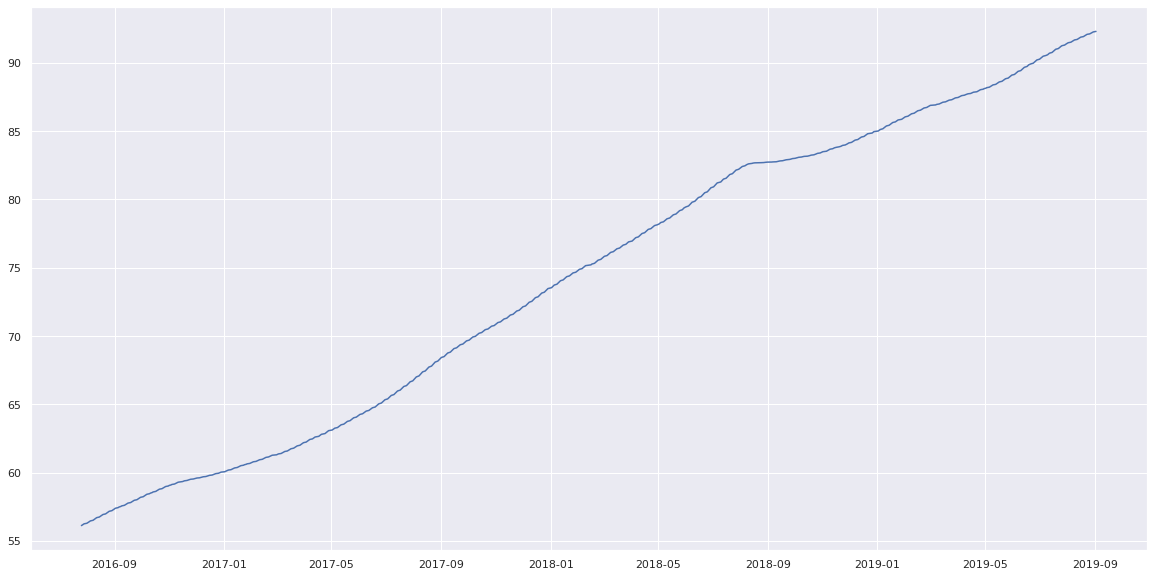

In [16]:
plt.figure(figsize=(20,10))
plt.plot(tendencia);

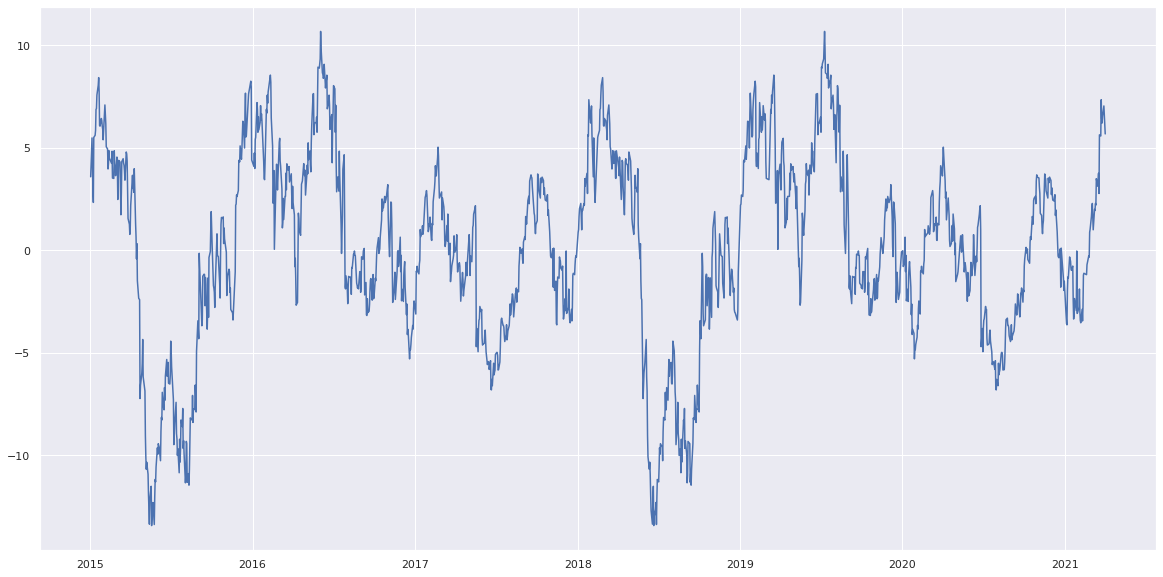

In [17]:
plt.figure(figsize=(20,10))
plt.plot(sazonal);

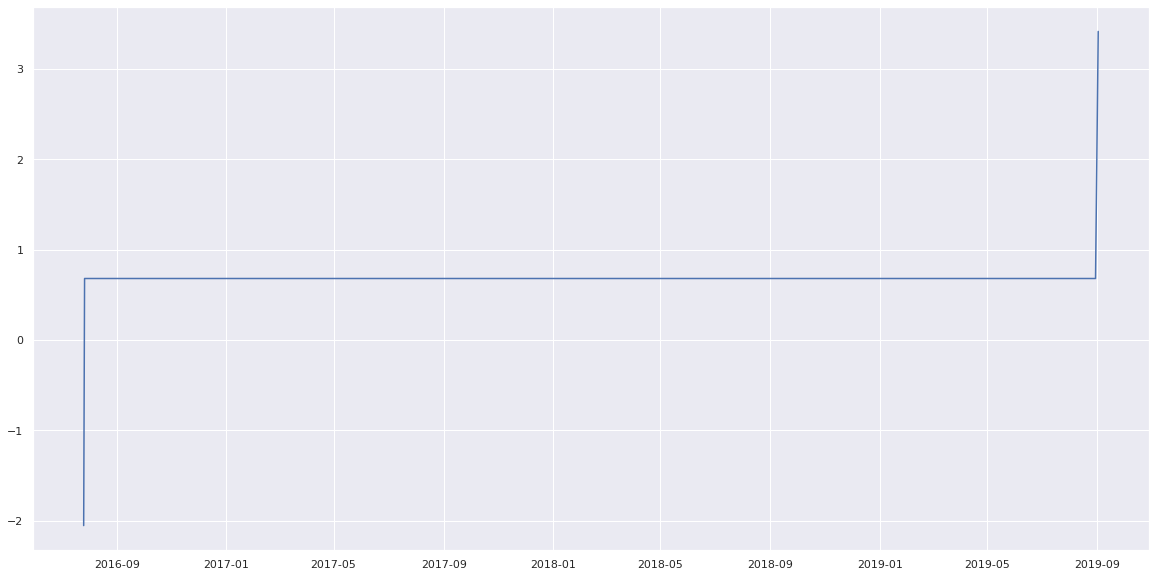

In [18]:
plt.figure(figsize=(20,10))
plt.plot(aleatorio);

## 2.5 Previsões com ARIMA

In [19]:
modelo = auto_arima(time_series, suppress_warnings=True, error_action='ignore')

In [20]:
# parâmtro P, Q, D
modelo.order

(2, 1, 2)

In [21]:
previsoes = modelo.predict(n_periods=90)

In [22]:
previsoes

array([110.59928908, 110.66799974, 110.62054582, 110.64256757,
       110.64525414, 110.62252564, 110.65812913, 110.61771116,
       110.65546884, 110.62613049, 110.64366065, 110.63880487,
       110.63235402, 110.64711683, 110.62789266, 110.6476517 ,
       110.63070102, 110.64253386, 110.63689124, 110.63647333,
       110.64184685, 110.63324929, 110.64310478, 110.63382836,
       110.64109807, 110.63668838, 110.6380013 , 110.63947178,
       110.63593576, 110.64060226, 110.63576654, 110.63994673,
       110.63699793, 110.63844057, 110.63848401, 110.63721571,
       110.63929074, 110.6368884 , 110.63916673, 110.63736615,
       110.63847433, 110.63812255, 110.63778936, 110.63863558,
       110.6375033 , 110.63868639, 110.63765588, 110.6383903 ,
       110.63802221, 110.63802602, 110.63832484, 110.63782431,
       110.6384097 , 110.6378503 , 110.63829609, 110.63801785,
       110.63811139, 110.63818636, 110.63798403, 110.63825865,
       110.63796929, 110.63822325, 110.63804044, 110.63

## 2.6 Gráfico das previsões

In [23]:
len(time_series)

1546

In [24]:
treinamento = time_series[:1181]
treinamento.shape

(1181,)

In [25]:
treinamento.index.min(), treinamento.index.max()

(Timestamp('2015-01-02 00:00:00'), Timestamp('2019-10-01 00:00:00'))

In [26]:
teste = time_series[1181:]
teste.shape

(365,)

In [27]:
teste.index.min(), teste.index.max()

(Timestamp('2019-10-02 00:00:00'), Timestamp('2021-04-01 00:00:00'))

In [28]:
modelo2 = auto_arima(treinamento, suppress_warnings=True, error_action='ignore')

In [29]:
teste.index

DatetimeIndex(['2019-10-02', '2019-10-03', '2019-10-04', '2019-10-07',
               '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11',
               '2019-10-14', '2019-10-15',
               ...
               '2021-03-17', '2021-03-18', '2021-03-19', '2021-03-22',
               '2021-03-23', '2021-03-24', '2021-03-25', '2021-03-26',
               '2021-03-29', '2021-04-01'],
              dtype='datetime64[ns]', name='Date', length=365, freq=None)

In [30]:
previsoes = pd.DataFrame(modelo2.predict(n_periods=365), index=teste.index)

In [31]:
previsoes.columns=['Previsoes']
previsoes

,Previsoes
Date,
2019-10-02,100.161893
2019-10-03,100.243004
2019-10-04,100.310918
2019-10-07,100.370450
2019-10-08,100.424660
...,...
2021-03-24,116.442669
2021-03-25,116.487618
2021-03-26,116.532567


In [32]:
teste

Date
2019-10-02     97.150002
2019-10-03     97.720001
2019-10-04     98.690002
2019-10-07     96.800003
2019-10-08     96.150002
                 ...    
2021-03-24    107.832138
2021-03-25    109.452454
2021-03-26    110.446930
2021-03-29    111.060303
2021-04-01    110.680000
Name: BOVA, Length: 365, dtype: float64

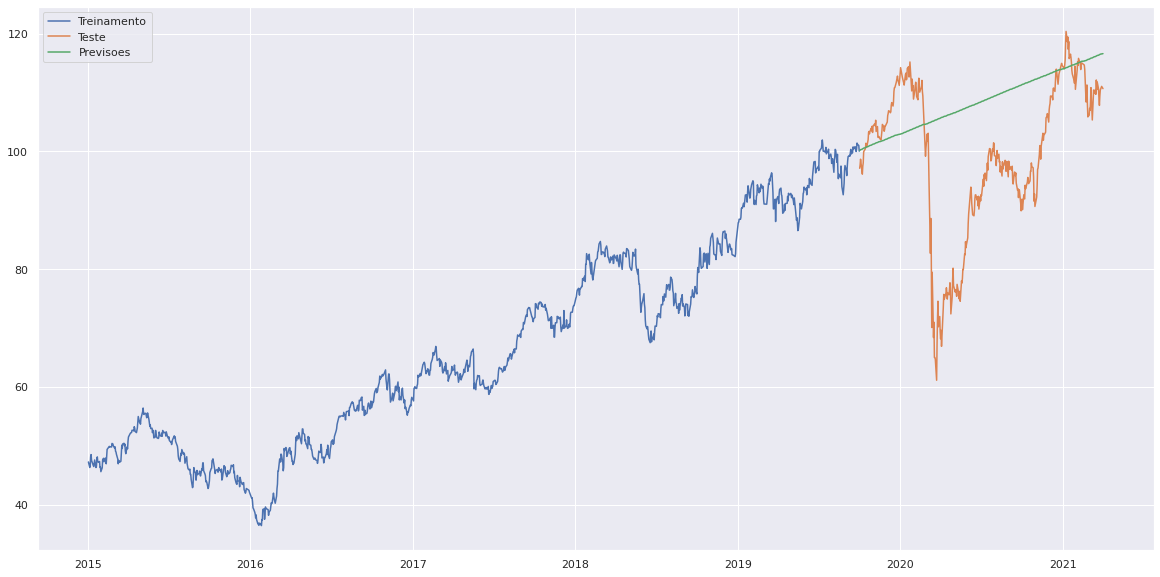

In [33]:
plt.figure(figsize=(20,10))
plt.plot(treinamento,label='Treinamento')
plt.plot(teste, label='Teste')
plt.plot(previsoes, label='Previsoes')
plt.legend();

## 2.7 Avaliação do ARIMA

In [34]:
teste[0:2]

Date
2019-10-02    97.150002
2019-10-03    97.720001
Name: BOVA, dtype: float64

In [35]:
previsoes[0:2]

,Previsoes
Date,
2019-10-02,100.161893
2019-10-03,100.243004


In [36]:
sum(abs(teste - previsoes['Previsoes']) / len(teste))

12.001465456583253

In [37]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(teste, previsoes)

12.001465456583244

# 3. Utilizando o algoritmo Facebook Prophet

## 3.1 Importação da biblioteca

In [38]:
from fbprophet import Prophet

In [39]:
dataset = pd.read_csv('/content/acoes.csv',  usecols = ['Date', 'BOVA'])

In [40]:
dataset = dataset[['Date', 'BOVA']].rename(columns = {'Date': 'ds', 'BOVA': 'y'})
dataset

,ds,y
0,2015-01-02,47.259998
1,2015-01-05,46.320000
2,2015-01-06,46.580002
3,2015-01-07,48.150002
4,2015-01-08,48.509998
...,...,...
1541,2021-03-24,107.832138
1542,2021-03-25,109.452454
1543,2021-03-26,110.446930
1544,2021-03-29,111.060303


## 3.2 Contrução do modelo e previsões

In [41]:
modelo = Prophet()

In [42]:
modelo.fit(dataset)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [43]:
futuro = modelo.make_future_dataframe(periods=90)

In [44]:
previsoes = modelo.predict(futuro)

In [45]:
previsoes.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-02,47.169932,43.058624,59.286719,47.169932,47.169932,4.169265,4.169265,4.169265,0.091216,0.091216,0.091216,4.078049,4.078049,4.078049,0.0,0.0,0.0,51.339196
1,2015-01-05,47.267347,44.076331,59.621878,47.267347,47.267347,4.587559,4.587559,4.587559,0.090807,0.090807,0.090807,4.496752,4.496752,4.496752,0.0,0.0,0.0,51.854905
2,2015-01-06,47.299818,43.918287,59.860312,47.299818,47.299818,4.706147,4.706147,4.706147,0.083435,0.083435,0.083435,4.622712,4.622712,4.622712,0.0,0.0,0.0,52.005966
3,2015-01-07,47.332290,44.528511,59.756584,47.332290,47.332290,4.761607,4.761607,4.761607,0.022589,0.022589,0.022589,4.739018,4.739018,4.739018,0.0,0.0,0.0,52.093897
4,2015-01-08,47.364762,44.854886,59.962487,47.364762,47.364762,4.937378,4.937378,4.937378,0.093095,0.093095,0.093095,4.844283,4.844283,4.844283,0.0,0.0,0.0,52.302139


In [46]:
len(dataset), len(previsoes)

(1546, 1636)

In [47]:
previsoes.tail(90)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1546,2021-04-02,103.168728,92.518312,107.937810,103.168728,103.168728,-3.005462,-3.005462,-3.005462,0.091216,0.091216,0.091216,-3.096678,-3.096678,-3.096678,0.0,0.0,0.0,100.163266
1547,2021-04-03,103.184825,92.065958,107.417316,103.184825,103.184825,-3.279373,-3.279373,-3.279373,-0.190571,-0.190571,-0.190571,-3.088802,-3.088802,-3.088802,0.0,0.0,0.0,99.905452
1548,2021-04-04,103.200922,92.453124,107.960428,103.200922,103.200922,-3.257621,-3.257621,-3.257621,-0.190571,-0.190571,-0.190571,-3.067051,-3.067051,-3.067051,0.0,0.0,0.0,99.943300
1549,2021-04-05,103.217018,92.844281,108.290646,103.217018,103.217018,-2.941321,-2.941321,-2.941321,0.090807,0.090807,0.090807,-3.032127,-3.032127,-3.032127,0.0,0.0,0.0,100.275698
1550,2021-04-06,103.233115,92.378564,108.486750,103.233115,103.233115,-2.901441,-2.901441,-2.901441,0.083435,0.083435,0.083435,-2.984876,-2.984876,-2.984876,0.0,0.0,0.0,100.331675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,2021-06-26,104.536960,92.761203,108.093918,103.806303,105.479791,-4.134066,-4.134066,-4.134066,-0.190571,-0.190571,-0.190571,-3.943495,-3.943495,-3.943495,0.0,0.0,0.0,100.402894
1632,2021-06-27,104.553057,93.154049,108.762981,103.803957,105.519265,-4.057497,-4.057497,-4.057497,-0.190571,-0.190571,-0.190571,-3.866926,-3.866926,-3.866926,0.0,0.0,0.0,100.495560
1633,2021-06-28,104.569154,92.495867,108.107725,103.791247,105.557411,-3.688198,-3.688198,-3.688198,0.090807,0.090807,0.090807,-3.779004,-3.779004,-3.779004,0.0,0.0,0.0,100.880956
1634,2021-06-29,104.585250,92.743607,108.499696,103.792488,105.593520,-3.596322,-3.596322,-3.596322,0.083435,0.083435,0.083435,-3.679757,-3.679757,-3.679757,0.0,0.0,0.0,100.988929


## 3.3 Gráfico das previsões

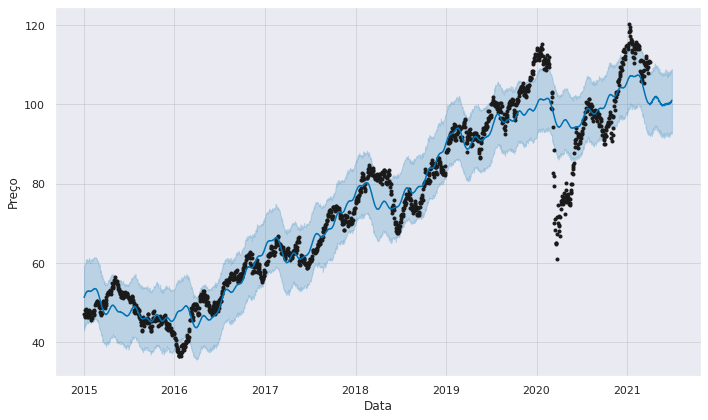

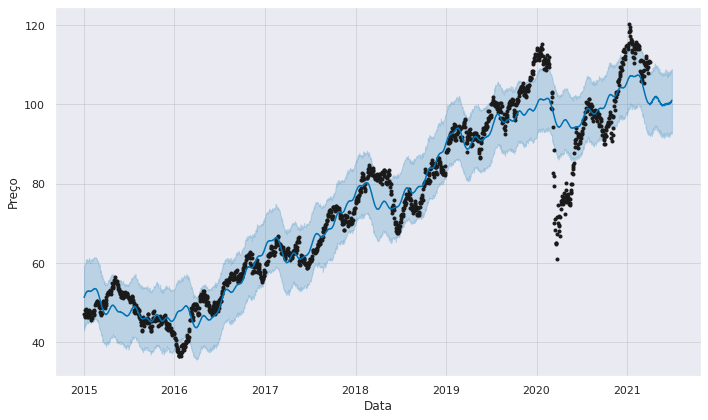

In [51]:

modelo.plot(previsoes, xlabel='Data', ylabel='Preço')

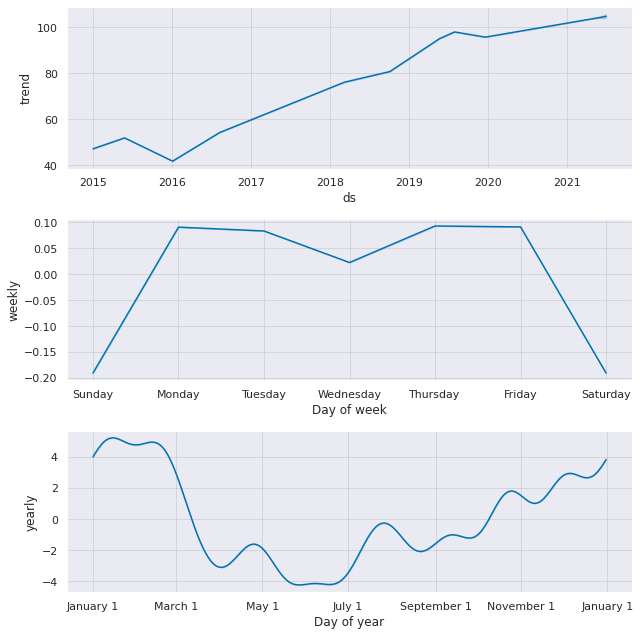

In [52]:
modelo.plot_components(previsoes);

In [55]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(modelo, previsoes)

In [56]:
plot_components_plotly(modelo, previsoes)

## 3.4 Avaliação

In [57]:
teste.shape

(365,)

In [58]:
pred = modelo.make_future_dataframe(periods=0)
previsoes = modelo.predict(pred)

In [59]:
previsoes.shape

(1546, 19)

In [60]:
previsoes = previsoes['yhat'].tail(365)

In [61]:
previsoes

1181     95.916835
1182     96.062269
1183     96.149167
1184     96.489928
1185     96.617019
           ...    
1541    100.555911
1542    100.514547
1543    100.415578
1544    100.215085
1545    100.155614
Name: yhat, Length: 365, dtype: float64

In [62]:
mean_absolute_error(teste, previsoes)

7.885645999016338

# 4 Conclusão

Ambos os modelos tiveram dificuldade diante do período referente à pandemia, onde as ações de muitas empresas despencaram. Essa dificuldade se dá pelo evento ter sido muito particular, fugindo dos padrões comumente encontrados. Avaliando os modelos, o Facebook Prophet obteve uma  acurácia superior, tendo a média de seu erro absoluto igual à 7,88, ante 12,00 do ARIMA.